### Introduction
In this notebook, I am going to train a simple linear regression model using tensorflow. Output of this model will be converted to tensorflow lite model and used in mobile for making inference

Note: This material is taken from Udacity course [Introduction to TensorFlow Lite
](https://https://classroom.udacity.com/courses/ud190)


In [ ]:
# import tensorflow
import tensorflow as tf

# for plotting graphs
import matplotlib.pyplot as plt


### Create Our Dataset
To Train our model we need dataset. In code cell below, we are using a simple data (enter manullay) to train our model.

This dataset satisfies linear equation
**y = 3x**
and we will use it to train our linear regression model

In [ ]:
# using this dataset, training loss shoot to infinity in first 5 training iteration
# TODO investigate reason
'''
# store data for x and y
x = [-123, -87, -45, -15, -4, -1, 0, 1, 2, 3, 4, 10,99, 189,234,567, 2345, 8900,20000]
y = [-369, -261, -135, -45, -12, -3, 0, 3, 6, 9, 12, 30, 297,567,702, 1701, 7035, 26700, 60000]

# to ensure x and y should have same number of elements before we start working with them
# we are using assert statement
assert len(x)==len(y),"Length of x and y does not match"
'''


In [ ]:
# store data for x and y
x = [-10, -4, -1, 0, 1, 2, 3, 4, 10, 15,19]
y = [-30, -12, -3, 0, 3, 6, 9, 12, 30, 45,57]

# to ensure x and y should have same number of elements before we start working with them
# we are using assert statement
assert len(x)==len(y),"Length of x and y does not match"


#### Python Assertion

Python’s assert statement is a debugging aid that tests a condition. If the condition is true, it does nothing and your program just continues to execute. But if the assert condition evaluates to false, it raises an AssertionError exception with an optional error message.

**Python’s Assert Syntax**

`assert_stmt ::=  "assert" expression ["," expression]`

**Caution:**

When you pass a tuple as the first argument in an assert statement, the assertion always evaluates as true and therefore never fails.

For example, this assertion will never fail:

`assert(1 == 2, 'This should fail')`

Ref: [Assert Statements in Python](https://dbader.org/blog/python-assert-tutorial#:~:text=Python's%20assert%20statement%20is%20a,with%20an%20optional%20error%20message.)


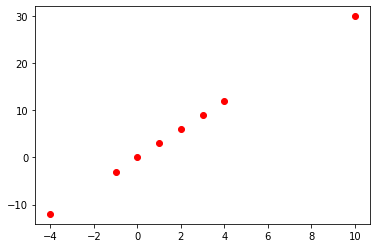

In [ ]:
plt.plot(x,y,'ro')

Here we are using single dense layer and single neuron to solve problem or train model

In [ ]:
# Create a simple Keras model
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x,y,epochs=500)

In [ ]:
model.predict([5])

array([[15.000036]], dtype=float32)

Now we have out trained model, we will start processing on it to convert it into tensorflow lite

In [ ]:
# Export the SavedModel
export_dir = '/tmp/saved_model'
tf.saved_model.save(model,export_dir=export_dir)

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

In [ ]:
# Save the tensorflow lite model
import pathlib
tflite_model_file = pathlib.Path('/tmp/foo.tflite')
tflite_model_file.write_bytes(tflite_model)